# Importing the Libraries

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

# Cloning YoloV5 git Repo

In [48]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15143, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15143 (delta 0), reused 3 (delta 0), pack-reused 15138
Receiving objects: 100% (15143/15143), 14.13 MiB | 15.81 MiB/s, done.
Resolving deltas: 100% (10384/10384), done.


In [49]:
%cd /content/yolov5/

/content/yolov5


# Installing YoloV5 requirements files

In [50]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.3.1 which is incompatible.


In [51]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
train_path = "/content/drive/MyDrive/brain/Yolo/train/images"
val_path = "/content/drive/MyDrive/brain/Yolo/valid/images"
crs_path = "/content/drive/MyDrive/brain/Yolo/images"

train_ratio = 0.8
val_ratio = 0.2

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname,dirs, files) in os.walk(crs_path):
#     print(files)
    for filename in files:
#         print("hello")
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs)*train_ratio)
count_for_val = int(len(imgs)*val_ratio)
print("training images are : ",count_for_train)
print("validation images are : ",count_for_val)

training images are :  17
validation images are :  4


In [52]:
len(imgs)

22

In [53]:
train_image_path = "/content/drive/MyDrive/brain/Yolo/train/images"
train_label_path = "/content/drive/MyDrive/brain/Yolo/train/labels"
val_image_path = "/content/drive/MyDrive/brain/Yolo/valid/images"
val_label_path = "/content/drive/MyDrive/brain/Yolo/valid/labels"

if not os.path.isdir(train_image_path):
    os.makedirs(train_image_path)
if not os.path.isdir(train_label_path):
    os.makedirs(train_label_path)
if not os.path.isdir(val_image_path):
    os.makedirs(val_image_path)
if not os.path.isdir(val_label_path):
    os.makedirs(val_label_path)

# cycle for train dir
for x in range(count_for_train):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(train_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(train_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)
    
# cycle for test dir
for x in range(count_for_val):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# rest of files
print("images length - ",len(imgs))
print(imgs,xmls)
for x in imgs:
    file_jpg = x
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
# shutil.copytree(crs_path,val_path)

images length -  1
['Not-Cancer-23-_jpg.rf.9dd4c5cda6e22ac0c811983696c520e0.jpg'] ['Not-Cancer-23-_jpg.rf.9dd4c5cda6e22ac0c811983696c520e0.txt']


# Downloading dataset.yaml file from google cloud for the dataset

In [54]:
with open(r'/content/drive/MyDrive/brain/Yolo/data.yaml', 'r') as file:
    lines = file.readlines()
    print(lines)

['train: /content/drive/MyDrive/brain/Yolo/train/images\n', 'val: /content/drive/MyDrive/brain/Yolo/valid/images\n', '\n', '\n', 'nc: 2\n', "names: ['NoTumor', 'Tumor']\n", '\n', 'roboflow:\n', '  workspace: project\n', '  project: tumor-detection-eqxql\n', '  version: 1\n', '  license: CC BY 4.0\n', '  url: https://universe.roboflow.com/project/tumor-detection-eqxql/dataset/1']


# Training the YoloV5 model 

In [55]:
!wandb disabled
!python train.py --img 415 --batch 16 --epochs 100 --data /content/drive/MyDrive/brain/Yolo/data.yaml --weights yolov5s.pt --cache --workers 2

/bin/bash: wandb: command not found
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/brain/Yolo/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-100-g4d28fec Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=

In [56]:
!zip -r /content/drive/MyDrive/brain/file.zip /content/yolov5

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/detect.py (deflated 69%)
  adding: content/yolov5/utils/ (stored 0%)
  adding: content/yolov5/utils/autoanchor.py (deflated 60%)
  adding: content/yolov5/utils/triton.py (deflated 67%)
  adding: content/yolov5/utils/loggers/ (stored 0%)
  adding: content/yolov5/utils/loggers/wandb/ (stored 0%)
  adding: content/yolov5/utils/loggers/wandb/wandb_utils.py (deflated 66%)
  adding: content/yolov5/utils/loggers/wandb/__init__.py (stored 0%)
  adding: content/yolov5/utils/loggers/wandb/__pycache__/ (stored 0%)
  adding: content/yolov5/utils/loggers/wandb/__pycache__/__init__.cpython-38.pyc (deflated 24%)
  adding: content/yolov5/utils/loggers/wandb/__pycache__/wandb_utils.cpython-38.pyc (deflated 48%)
  adding: content/yolov5/utils/loggers/__init__.py (deflated 73%)
  adding: content/yolov5/utils/loggers/comet/ (stored 0%)
  adding: content/yolov5/utils/loggers/comet/README.md (deflated 63%)
  adding: content/yolov5/utils/loggers/

RCNN

In [12]:
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pathlib import Path
import random
import os
import cv2

In [13]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

In [14]:
base_path = '/content/drive/MyDrive/brain/'
ann_path = base_path + 'Annotations/'
img_path = base_path + 'Images/'

In [15]:
def get_file_list(root, file_type):
    return [os.path.join(directory_path, f) for directory_path, directory_name, 
            files in os.walk(root) for f in files if f.endswith(file_type)]

In [17]:
def get_train_df(ann_path, img_path):
    ann_path_list = get_file_list(ann_path, '.xml')
    ann_list = []
    for a_path in ann_path_list:
        root = ET.parse(a_path).getroot()
        ann = {}
        ann['filename'] = Path(str(img_path) + '/'+ root.find("./filename").text)
        ann['width'] = root.find("./size/width").text
        ann['height'] = root.find("./size/height").text
        ann['class'] = root.find("./object/name").text
        ann['xmin'] = int(root.find("./object/bndbox/xmin").text)
        ann['ymin'] = int(root.find("./object/bndbox/ymin").text)
        ann['xmax'] = int(root.find("./object/bndbox/ymax").text)
        ann_list.append(ann)
    return pd.DataFrame(ann_list)

In [18]:
df_train = get_train_df(ann_path, img_path)

In [19]:
df_train['class'].value_counts()

Tumor      96
NoTumor    37
Name: class, dtype: int64

In [21]:
class_dict = {'Tumor': 0,'NoTumor':1}
idx_to_class = {k:v for k,v in enumerate(list(class_dict.keys()))}
df_train['class'] = df_train['class'].apply(lambda x:  class_dict[x])
df_train.head()

,filename,width,height,class,xmin,ymin,xmax
0,/content/drive/MyDrive/brain/Images/Cancer-112...,640,640,0,79,309,519
1,/content/drive/MyDrive/brain/Images/Cancer-112...,640,640,0,302,122,334
2,/content/drive/MyDrive/brain/Images/Cancer-111...,640,640,0,387,358,469
3,/content/drive/MyDrive/brain/Images/Cancer-111...,640,640,0,300,441,625
4,/content/drive/MyDrive/brain/Images/Cancer-110...,640,640,0,79,351,600


In [22]:
# additional functions

def read_image(path):
    return cv2.cvtColor(cv2.imread(str(path)), cv2.COLOR_BGR2RGB)

def create_bb_array(x):
    return np.array([x[5],x[4],x[1],x[2]])

In [23]:
# masks functions

def create_mask(bb, x):
    rows,cols,*_ = x.shape
    Y = np.zeros((rows, cols))
    bb = bb.astype(np.int)
    Y[bb[0]:bb[2], bb[1]:bb[3]] = 1.
    return Y

def mask_to_bb(Y):
    cols, rows = np.nonzero(Y)
    if len(cols)==0: 
        return np.zeros(4, dtype=np.float32)
    top_row = np.min(rows)
    left_col = np.min(cols)
    bottom_row = np.max(rows)
    right_col = np.max(cols)
    return np.array([left_col, top_row, right_col, bottom_row], dtype=np.float32)

In [24]:
def resize_image_bb(read_path, write_path, bb, sz):
    im = read_image(read_path)
    im_resized = cv2.resize(im, (int(1.49*sz), sz))
    Y_resized = cv2.resize(create_mask(bb, im), (int(1.49*sz), sz))
    new_path = str(write_path/read_path.parts[-1])
    cv2.imwrite(new_path, cv2.cvtColor(im_resized, cv2.COLOR_RGB2BGR))
    return new_path, mask_to_bb(Y_resized)

In [25]:
!rm -rf images_resized
!mkdir images_resized

In [26]:
new_paths = []
new_bbs = []
train_path_resized = Path('images_resized')

for index, row in df_train.iterrows():
    new_path,new_bb = resize_image_bb(row['filename'], train_path_resized, create_bb_array(row.values),300)
    new_paths.append(new_path)
    new_bbs.append(new_bb)
    
df_train['new_path'] = new_paths
df_train['new_bb'] = new_bbs

<ipython-input-23-9a8ee5f7d9e1>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bb = bb.astype(np.int)


DAta Augmentation

In [27]:
# crop functions

def crop(im, r, c, target_r, target_c): 
    return im[r:r+target_r, c:c+target_c]

def random_crop(x, r_pix=8):
    r, c,*_ = x.shape
    c_pix = round(r_pix*c/r)
    rand_r = random.uniform(0, 1)
    rand_c = random.uniform(0, 1)
    start_r = np.floor(2*rand_r*r_pix).astype(int)
    start_c = np.floor(2*rand_c*c_pix).astype(int)
    return crop(x, start_r, start_c, r-2*r_pix, c-2*c_pix)

def center_crop(x, r_pix=8):
    r, c,*_ = x.shape
    c_pix = round(r_pix*c/r)
    return crop(x, r_pix, c_pix, r-2*r_pix, c-2*c_pix)

def random_cropXY(x, Y, r_pix=8):
    r, c,*_ = x.shape
    c_pix = round(r_pix*c/r)
    rand_r = random.uniform(0, 1)
    rand_c = random.uniform(0, 1)
    start_r = np.floor(2*rand_r*r_pix).astype(int)
    start_c = np.floor(2*rand_c*c_pix).astype(int)
    xx = crop(x, start_r, start_c, r-2*r_pix, c-2*c_pix)
    YY = crop(Y, start_r, start_c, r-2*r_pix, c-2*c_pix)
    return xx, YY

In [28]:
def rotate_cv(im, deg, y=False, mode=cv2.BORDER_REFLECT, interpolation=cv2.INTER_AREA):
    """ Rotates an image by deg degrees"""
    r,c,*_ = im.shape
    M = cv2.getRotationMatrix2D((c/2,r/2),deg,1)
    if y:
        return cv2.warpAffine(im, M,(c,r), borderMode=cv2.BORDER_CONSTANT)
    return cv2.warpAffine(im,M,(c,r), borderMode=mode, flags=cv2.WARP_FILL_OUTLIERS+interpolation)

In [29]:
# main function for augmentation

def transformsXY(path, bb, transforms):
    x = cv2.imread(str(path)).astype(np.float32)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)/255
    Y = create_mask(bb, x)
    if transforms:
        rdeg = (np.random.random()-.50)*20
        x = rotate_cv(x, rdeg)
        Y = rotate_cv(Y, rdeg, y=True)
        if np.random.random() > 0.5: 
            x = np.fliplr(x).copy()
            Y = np.fliplr(Y).copy()
        x, Y = random_cropXY(x, Y)
    else:
        x, Y = center_crop(x), center_crop(Y)
    return x, mask_to_bb(Y)

In [30]:
# functions to create and show the boxes

def create_corner_rect(bb, color='red'):
    bb = np.array(bb, dtype=np.float32)
    return plt.Rectangle((bb[1], bb[0]), bb[3]-bb[1], bb[2]-bb[0], color=color,
                         fill=False, lw=3)

def show_corner_bb(im, bb):
    plt.imshow(im)
    plt.gca().add_patch(create_corner_rect(bb))

In [31]:
df_train.values[10][8]

array([ 87.,  78., 299., 446.], dtype=float32)

In [32]:
# before transformation

im = cv2.imread(str(df_train.values[10][8]))
#im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#show_corner_bb(im, df_train.values[10][8])

In [33]:
df_train = df_train.reset_index()

X = df_train[['new_path', 'new_bb']]
y = df_train['class']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

In [35]:
class RoadDataset(Dataset):
    def __init__(self, paths, bb, y, transforms=False):
        self.transforms = transforms
        self.paths = paths.values
        self.bb = bb.values
        self.y = y.values
        
    def normalize(self, im):
        imagenet_stats = np.array([[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]])
        return (im - imagenet_stats[0])/imagenet_stats[1]
    
    def __len__(self):
        return len(self.paths)
    
    def __getitem__(self, idx):
        path = self.paths[idx]
        y_class = self.y[idx]
        x, y_bb = transformsXY(path, self.bb[idx], self.transforms)
        x = self.normalize(x)
        x = np.rollaxis(x, 2)
        return x, y_class, y_bb

In [36]:
batch_size = 64

train_ds = RoadDataset(X_train['new_path'],X_train['new_bb'] ,y_train, transforms=True)
valid_ds = RoadDataset(X_test['new_path'],X_test['new_bb'],y_test)

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=batch_size)

In [37]:
class RCNN(nn.Module):
    def __init__(self):
        super(RCNN, self).__init__()
        resnet = models.resnet34(pretrained=True)
        layers = list(resnet.children())[:8]
        self.features1 = nn.Sequential(*layers[:6])
        self.features2 = nn.Sequential(*layers[6:])
        self.classifier = nn.Sequential(nn.BatchNorm1d(512), nn.Linear(512, 4))
        self.bb = nn.Sequential(nn.BatchNorm1d(512), nn.Linear(512, 4))
        
    def forward(self, x):
        x = self.features1(ax)
        x = self.features2(x)
        x = F.relu(x)
        x = nn.AdaptiveAvgPool2d((1,1))(x)
        x = x.view(x.shape[0], -1)
        return self.classifier(x), self.bb(x)

In [38]:
def update_optimizer(optimizer, lr):
    for i, param_group in enumerate(optimizer.param_groups):
        param_group["lr"] = lr

In [39]:
def train_epocs(model, optimizer, train_dl, val_dl, epochs=10,C=1000):
    idx = 0
    for i in range(epochs):
        model.train()
        total = 0
        sum_loss = 0
        for x, y_class, y_bb in train_dl:
            batch = y_class.shape[0]
            x = x.cuda().float()
            y_class = y_class.cuda()
            y_bb = y_bb.cuda().float()
            out_class, out_bb = model(x)
            loss_class = F.cross_entropy(out_class, y_class, reduction="sum")
            loss_bb = F.l1_loss(out_bb, y_bb, reduction="none").sum(1)
            loss_bb = loss_bb.sum()
            loss = loss_class + loss_bb/C
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            idx += 1
            total += batch
            sum_loss += loss.item()
        train_loss = sum_loss/total
        val_loss, val_acc = val_metrics(model, valid_dl, C)
        if (i+1) % 10 == 0:
            print("i:%4d train_loss:%5.3f val_loss:%5.3f val_acc:%5.3f" % ((i+1), train_loss, val_loss, val_acc))
    return sum_loss/total

In [40]:
def val_metrics(model, valid_dl, C=1000):
    model.eval()
    total = 0
    sum_loss = 0
    correct = 0 
    for x, y_class, y_bb in valid_dl:
        batch = y_class.shape[0]
        x = x.cuda().float()
        y_class = y_class.cuda()
        y_bb = y_bb.cuda().float()
        out_class, out_bb = model(x)
        loss_class = F.cross_entropy(out_class, y_class, reduction="sum")
        loss_bb = F.l1_loss(out_bb, y_bb, reduction="none").sum(1)
        loss_bb = loss_bb.sum()
        loss = loss_class + loss_bb/C
        _, pred = torch.max(out_class, 1)
        correct += pred.eq(y_class).sum().item()
        sum_loss += loss.item()
        total += batch
    return sum_loss/total, correct/total

In [41]:
model = RCNN().cuda()
parameters = filter(lambda p: p.requires_grad, model.parameters())
optimizer = torch.optim.Adam(parameters, lr=0.002)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [42]:
train_epocs(model, optimizer, train_dl, valid_dl, epochs=101)

<ipython-input-23-9a8ee5f7d9e1>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bb = bb.astype(np.int)


i:  10 train_loss:1.236 val_loss:98.180 val_acc:0.075
i:  20 train_loss:0.846 val_loss:13.819 val_acc:0.650
i:  30 train_loss:1.334 val_loss:7.879 val_acc:0.475
i:  40 train_loss:0.889 val_loss:20.872 val_acc:0.450
i:  50 train_loss:0.757 val_loss:1.686 val_acc:0.725
i:  60 train_loss:0.681 val_loss:1.995 val_acc:0.750
i:  70 train_loss:0.649 val_loss:1.794 val_acc:0.850
i:  80 train_loss:0.684 val_loss:1.636 val_acc:0.825
i:  90 train_loss:0.546 val_loss:6.192 val_acc:0.675
i: 100 train_loss:0.445 val_loss:2.275 val_acc:0.850


0.42362598706317206

In [43]:
# Predict the first image of the validation set
test_batch = next(iter(valid_dl))
test_batch[0] = test_batch[0].type(torch.cuda.FloatTensor).cuda()

<ipython-input-23-9a8ee5f7d9e1>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bb = bb.astype(np.int)


In [44]:
out, bb = model(test_batch[0])

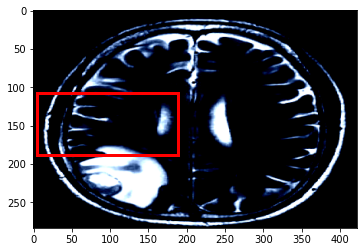

In [45]:
show_corner_bb(np.moveaxis(test_batch[0][0].cpu().numpy(), 0, 2), bb.detach().cpu().numpy().astype(int)[0])